## MNIST: Deep Dive

Feburary 2019

### Load MNIST

In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

print('Shape X_train:', X_train.shape)
print('Shape X_test:', X_test.shape, '\n')
print('Pixel-Row 10 of second training sample:\n', X_train[1][9], '\n')
print('Maximum Value in Dataset:', X_train.max())

Shape X_train: (60000, 28, 28)
Shape X_test: (10000, 28, 28) 

Pixel-Row 10 of second training sample:
 [  0   0   0   0   0   0   0   0   0   0  51 238 253 253 190 114 253 228
  47  79 255 168   0   0   0   0   0   0] 

Maximum Value in Dataset: 255


In [27]:
#min-max scaling --> /255
X_train, X_test = X_train / 255.0, X_test / 255.0

print('Pixel-Row 10 of second training sample:\n', X_train[1][9], '\n') 

Pixel-Row 10 of second training sample:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.2        0.93333333
 0.99215686 0.99215686 0.74509804 0.44705882 0.99215686 0.89411765
 0.18431373 0.30980392 1.         0.65882353 0.         0.
 0.         0.         0.         0.        ] 



### Explore Dataset by Visualizing

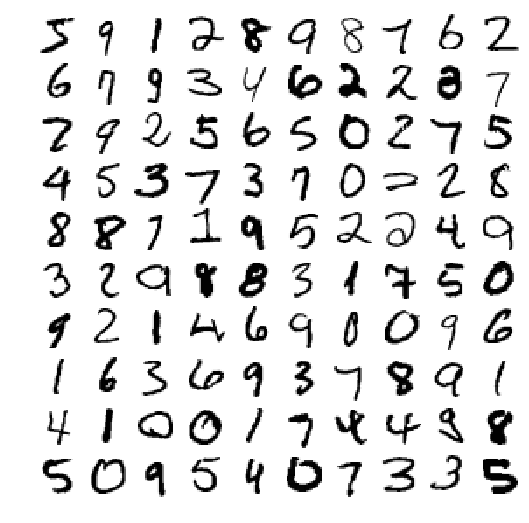

In [26]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 

def plot_digits(instances, images_per_row=10):
    
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")

    
plt.figure(figsize=(9,9))
example_images = np.r_[X_train[:60000:600]]
plot_digits(example_images, images_per_row=10)
plt.show()

### Reshaping

In [28]:
#train: reshaping to 2d array 
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))
print(X_train.shape)

#test: reshaping to 2d array
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))
print(X_test.shape)

(60000, 784)
(10000, 784)


### Random Forest Classification

In [10]:
import multiprocessing

multiprocessing.cpu_count()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

rfc = RandomForestClassifier(random_state=42)

param_grid_rf = { 
    'n_estimators': [20,50,100,150],
    'max_features': ['auto', 'log2'],
    'max_depth' : [10,50,100]
}

CV_rfc = GridSearchCV(estimator=rfc, 
                      param_grid=param_grid_rf, 
                      cv=3, n_jobs=-1)
CV_rfc.fit(X_train, y_train)
CV_rfc_df = pd.DataFrame(CV_rfc.cv_results_)
CV_rfc_df.to_csv("CV_rfc_1.csv", index=False)

In [25]:
#show df 
CV_rfc_df = pd.read_csv('CV_rfc_1.csv')
CV_rfc_df.iloc[:,:7]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators
0,7.626460,0.367245,0.936000,0.964175,10,auto,20
1,19.106449,0.615647,0.941750,0.968475,10,auto,50
2,37.253965,1.153473,0.944150,0.970100,10,auto,100
3,55.377140,1.716542,0.944900,0.970317,10,auto,150
4,4.137938,0.291914,0.921483,0.950025,10,log2,20
5,8.199152,0.615990,0.932433,0.958083,10,log2,50
6,14.778259,1.183322,0.935467,0.960833,10,log2,100
7,21.892908,1.823947,0.937017,0.961975,10,log2,150
8,11.995821,0.366670,0.954817,0.999875,50,auto,20
9,27.104403,0.786219,0.962750,1.000000,50,auto,50


In [ ]:
rfc = RandomForestClassifier(random_state=42)

param_grid_rf = { 
    'n_estimators': [150],
    'max_features': ['auto'],
    'max_depth' : [20,30,40], 
    'criterion' : ['gini','entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, 
                      param_grid=param_grid_rf, 
                      cv=3, n_jobs=-1)
CV_rfc.fit(X_train, y_train)
CV_rfc_df = pd.DataFrame(CV_rfc.cv_results_)
CV_rfc_df.to_csv("CV_rfc_2.csv", index=False)

In [15]:
#show df 
CV_rfc_df = pd.read_csv('CV_rfc_2.csv')
CV_rfc_df.iloc[:,:8]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_max_features,param_n_estimators
0,72.878077,2.184331,0.964700,0.999575,gini,20,auto,150
1,75.628709,2.331944,0.966050,1.000000,gini,30,auto,150
2,73.469133,2.125864,0.965733,1.000000,gini,40,auto,150
3,138.698525,1.943580,0.964867,1.000000,entropy,20,auto,150
4,140.937850,1.928317,0.965767,1.000000,entropy,30,auto,150
5,117.361626,1.496601,0.965767,1.000000,entropy,40,auto,150


In [5]:
#optimized 
rfc_optimized = RandomForestClassifier(n_estimators=150, max_depth=30)

rfc_optimized.fit(X_train, y_train)
y_pred = rfc_optimized.predict(X_test)

print('Accuracy (Test):', accuracy_score(y_test, y_pred), '\n')
print(confusion_matrix(y_test, y_pred))

Accuracy (Test): 0.9702 

[[ 972    0    0    0    0    2    1    1    3    1]
 [   0 1124    2    3    0    2    2    0    1    1]
 [   5    1  999    6    2    0    4    9    6    0]
 [   0    0   10  974    0    5    0    9    8    4]
 [   1    0    1    0  956    0    5    0    2   17]
 [   3    0    1   12    1  861    5    2    5    2]
 [   6    3    1    0    3    3  940    0    2    0]
 [   1    3   23    1    1    0    0  985    2   12]
 [   4    0    5    8    3    5    4    4  933    8]
 [   6    6    1   10   13    2    1    4    8  958]]


### Support Vector Classification

"The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples 
which makes it hard to scale to dataset with more than a couple of 10000 samples. <br> The multiclass support is handled according to a one-vs-one scheme."
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [29]:
#Cut Train
X_train_cut = X_train[20000:25000]
y_train_cut = y_train[20000:25000]
pd.Series(y_train_cut).value_counts()

1    568
2    521
3    516
7    504
4    500
9    496
6    491
0    478
8    466
5    460
dtype: int64

In [30]:
len(y_train_cut)

5000

In [ ]:
from sklearn import svm

svm = svm.SVC(random_state=40, probability=False)

param_grid_svm = { 
    'C': [1,3,10],
    'kernel': ['poly','sigmoid'],
    'gamma' : [0.003, 0.01, 0.05]
}

CV_svm = GridSearchCV(estimator=svm, 
                      param_grid=param_grid_svm,
                      cv=3, n_jobs=-1, verbose=3)

CV_svm.fit(X_train_cut, y_train_cut)
CV_svm_df = pd.DataFrame(CV_svm.cv_results_)
CV_svm_df.to_csv("CV_svm.csv", index=False)

In [38]:
#show df 
CV_svm_df = pd.read_csv('CV_svm.csv')
CV_svm_df.iloc[:,:7]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel
0,17.304843,7.327835,0.4682,0.498305,1,0.003,poly
1,6.788959,4.414726,0.8928,0.918398,1,0.003,sigmoid
2,6.298263,2.759524,0.9052,0.959500,1,0.010,poly
3,4.746999,3.425968,0.8754,0.902899,1,0.010,sigmoid
4,4.148001,2.936883,0.9264,1.000000,1,0.050,poly
5,10.158736,5.890987,0.3088,0.312997,1,0.050,sigmoid
6,13.703912,5.804488,0.7160,0.754801,3,0.003,poly
7,4.653438,3.660600,0.9080,0.938099,3,0.003,sigmoid
8,4.884518,2.317934,0.9240,0.989402,3,0.010,poly
9,3.496095,2.715213,0.8568,0.888101,3,0.010,sigmoid


In [ ]:
svm_linear = svm.SVC(random_state=40, probability=False)

param_grid_svm = { 
    'C': [0.001,0.01,1,10],
    'kernel': ['linear']
}

CV_svm_linear = GridSearchCV(estimator=svm_linear, 
                      param_grid=param_grid_svm,
                      cv=3, n_jobs=-1, verbose=3)

CV_svm_linear.fit(X_train_cut, y_train_cut)
CV_svm_linear_df = pd.DataFrame(CV_svm_linear.cv_results_)
CV_svm_linear_df.to_csv("CV_svm_linear.csv", index=False)

In [36]:
#show df 
CV_svm_linear_df = pd.read_csv('CV_svm_linear.csv')
CV_svm_linear_df.iloc[:,:5]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C
0,1.914463,2.320199,0.8678,0.885296,0.001
1,2.072443,0.884285,0.9086,0.943899,0.010
2,2.413595,0.629663,0.8970,1.000000,1.000
3,1.920772,0.494204,0.8970,1.000000,10.000


In [ ]:
svm_poly = svm.SVC(random_state=40, probability=False)

param_grid_poly = { 
    'C': [1,10,50],
    'kernel': ['poly'], 
    'degree': [4], 
    'gamma' : [0.003, 0.01, 0.05]
}

CV_svm_poly = GridSearchCV(estimator=svm_poly, 
                      param_grid=param_grid_poly,
                      cv=3, n_jobs=-1, verbose=3)

CV_svm_poly.fit(X_train_cut, y_train_cut)
CV_svm_poly_df = pd.DataFrame(CV_svm_poly.cv_results_)
CV_svm_poly_df.to_csv("CV_svm_poly_df.csv", index=False)

In [44]:
#show df 
CV_svm_linear_df = pd.read_csv('CV_svm_poly_df.csv')
CV_svm_linear_df.iloc[:,:7]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_degree,param_gamma
0,20.328265,6.826027,0.1622,0.173601,1,4,0.003
1,8.302107,3.085035,0.8456,0.912295,1,4,0.010
2,4.458274,1.920145,0.9048,1.000000,1,4,0.050
3,14.905006,5.994984,0.5644,0.607907,10,4,0.003
4,5.274755,2.296660,0.9034,0.989102,10,4,0.010
5,4.488384,2.012327,0.9050,1.000000,10,4,0.050
6,9.904327,3.742396,0.7816,0.841595,50,4,0.003
7,4.489903,2.074932,0.9062,0.998400,50,4,0.010
8,4.774873,2.105253,0.9050,1.000000,50,4,0.050


### XGBoost Classification

#### First Grid Search 

In [ ]:
from xgboost import XGBClassifier

param_grid_xgb = {
        'max_depth': [10,30],
        'eta': [0.03,0.3],
        'subsample': [0.6, 1.0]
        }

xgb = XGBClassifier(objective='multi:softmax', num_estimators=30,
                    num_class=10, nthread=1)

xgb_CV = GridSearchCV(xgb, param_grid=param_grid_xgb, 
                      n_jobs=4, cv=3, verbose=3)

xgb_CV.fit(X_train_cut, y_train_cut)
xgb_CV_df = pd.DataFrame(xgb_CV.cv_results_)
xgb_CV_df.to_csv("CV_xgb.csv", index=False)

In [79]:
#show df 
CV_xgb_df = pd.read_csv('CV_xgb.csv')
CV_xgb_df.iloc[:,:7]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_eta,param_max_depth,param_subsample
0,522.446035,0.695296,0.9367,1.0,0.03,10,0.6
1,505.894187,0.709714,0.9327,1.0,0.03,10,1.0
2,551.150401,0.694085,0.9376,1.0,0.03,30,0.6
3,561.731856,0.691521,0.9323,1.0,0.03,30,1.0
4,499.796979,0.672916,0.9367,1.0,0.30,10,0.6
5,499.211471,0.690188,0.9327,1.0,0.30,10,1.0
6,548.553937,0.705749,0.9376,1.0,0.30,30,0.6
7,532.752055,0.530744,0.9323,1.0,0.30,30,1.0


#### Using the power of XGBoost 

In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices()[2]) #GPU availabe

name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7378770976794215647
physical_device_desc: "device: XLA_GPU device"



In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=(1/6), random_state=42)
print(len(X_train),len(X_val))

50000 10000


In [ ]:
import xgboost as xgb

params = {"subsample": 0.6,
          "objective": "multi:softmax",
          "num_class": 10,
          'max_bin': 16,
          "tree_method": "gpu_hist"}

n_rounds = 600
early_stopping = 50

d_train = xgb.DMatrix(X_train, label=y_train)
d_val = xgb.DMatrix(X_val, label=y_val)
eval_list = [(d_train, "train"), (d_val, "validation")]

xgb_results = xgb.train(params, d_train, n_rounds, evals=eval_list, 
                        early_stopping_rounds=early_stopping, verbose_eval=True)

In [10]:
#save model 
xgb_results.save_model('xgb.model')

In [9]:
d_test = xgb.DMatrix(X_test, label=y_test)

y_pred = xgb_results.predict(d_test)

print('Accuracy (Test):', accuracy_score(y_test, y_pred), '\n')
print(confusion_matrix(y_test, y_pred))

Accuracy (Test): 0.9793 

[[ 969    0    1    0    0    2    3    1    4    0]
 [   0 1128    2    2    0    0    2    0    1    0]
 [   3    0 1011    4    0    0    1    6    6    1]
 [   0    0    5  990    0    5    0    4    4    2]
 [   1    0    2    0  958    0    5    0    2   14]
 [   3    0    0    8    0  871    4    1    4    1]
 [   5    2    0    0    2    4  939    0    6    0]
 [   1    4   13    2    1    0    0  999    0    8]
 [   4    0    4    2    1    3    2    2  952    4]
 [   4    4    1    5    7    1    1    4    6  976]]


### Convolutional Neural Network 

In [19]:
#Imports
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import time 
import itertools

#convert to categorical:
#we need validation set here too
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

#### Basic Network

In [66]:
optimizers = ['SGD', 'rmsprop', 'adadelta']
loss_functions = ['mean_squared_error', 'categorical_crossentropy', 'hinge']
activations = ['relu', 'selu', 'sigmoid']

concat = (optimizers, loss_functions, activations)
concat = list(concat)

my_grid = list(itertools.product(*concat))
my_grid[:3]

[('SGD', 'mean_squared_error', 'relu'),
 ('SGD', 'mean_squared_error', 'selu'),
 ('SGD', 'mean_squared_error', 'sigmoid')]

In [ ]:
results_df = pd.DataFrame(columns=["fit_time", "score_time", "test_score", "test_loss", 
                                   "param_opt", "param_loss", "param_activation"])

for params in my_grid: 
    
    network_1 = Sequential()
    network_1.add(Dense(512, activation=params[2], input_shape=(28 * 28,)))
    network_1.add(Dense(10, activation='softmax'))

    network_1.compile(optimizer=params[0],
                    loss=params[1],
                    metrics=['accuracy'])
    
    start_time = time.time()
    
    #fit
    network_1.fit(X_train, y_train, 
                  epochs=5, 
                  batch_size=128,
                  validation_data=(X_val, y_val))
    
    fit_time = time.time() - start_time
    print('Finished in {}s'.format(fit_time))
    
    #predict
    test_loss, test_acc = network_1.evaluate(X_test, y_test)
    pred_time = time.time() - (fit_time + start_time)
    
    print('test_acc:', test_acc)
    
    #save to df 
    results_df.loc[len(results_df)] = [fit_time, pred_time, test_acc, test_loss, *params]

results_df.to_csv('NN_eval_1.csv', index=False)

In [70]:
#show df 
NN_eval_1 = pd.read_csv('NN_eval_1.csv')
NN_eval_1

,fit_time,score_time,test_score,test_loss,param_opt,param_loss,param_activation
0,7.120065,0.380174,0.5192,0.074841,SGD,mean_squared_error,relu
1,7.260463,0.396242,0.7342,0.047538,SGD,mean_squared_error,selu
2,7.125427,0.387182,0.2028,0.088801,SGD,mean_squared_error,sigmoid
3,7.627551,0.400516,0.9103,0.337196,SGD,categorical_crossentropy,relu
4,7.995989,0.416158,0.9116,0.320163,SGD,categorical_crossentropy,selu
5,7.697661,0.406919,0.8516,0.716829,SGD,categorical_crossentropy,sigmoid
6,7.254456,0.391415,0.2083,0.984957,SGD,hinge,relu
7,7.587198,0.407576,0.4484,0.973375,SGD,hinge,selu
8,7.307953,0.397411,0.1013,0.989126,SGD,hinge,sigmoid
9,8.074968,0.390798,0.9782,0.003296,rmsprop,mean_squared_error,relu


#### Optimizing: Adding Layers

In [20]:
###Reshape for Input 
K.set_image_dim_ordering('th')
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_val = X_val.reshape(X_val.shape[0], 1, 28, 28)

In [100]:
###Construct Networks 

#Network incl. 1 Conv2D Layer + Pooling + Fully Connected
network_2 = Sequential()
network_2.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(1,28,28)))
network_2.add(MaxPooling2D(pool_size=(2, 2)))
network_2.add(Flatten())
network_2.add(Dense(256, activation='relu'))
network_2.add(Dense(10, activation='softmax'))

#Network 3 incl. 2 Conv2D Layers + Pooling + Fully Connected
network_3 = Sequential()
network_3.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(1,28,28)))
network_3.add(Conv2D(64, (3, 3), activation='relu'))
network_3.add(MaxPooling2D(pool_size=(2, 2)))
network_3.add(Flatten())
network_3.add(Dense(256, activation='relu'))
network_3.add(Dense(10, activation='softmax'))

#Network 4 incl. 2 Conv2D Layers + Dropout + Pooling + Fully Connected 
network_4 = Sequential()
network_4.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(1,28,28)))
network_4.add(Conv2D(64, (3, 3), activation='relu'))
network_4.add(MaxPooling2D(pool_size=(2, 2)))
network_4.add(Dropout(0.25))
network_4.add(Flatten())
network_4.add(Dense(256, activation='relu'))
network_4.add(Dropout(0.5))
network_4.add(Dense(10, activation='softmax'))

In [101]:
#Run networks 
for network in [network_2, network_3, network_4]:
    
    network.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    #fit
    network.fit(X_train, y_train,
              batch_size=128,
              epochs=8,
              verbose=1,
              validation_data=(X_val, y_val))

    fit_time = time.time() - start_time
    print('Fit finished in {}s'.format(fit_time))

    #predict
    test_loss, test_acc = network.evaluate(X_test, y_test)
    pred_time = time.time() - (fit_time + start_time)
    print('Pred finished in {}s'.format(pred_time))
    print('Test Accuracy: {}, Loss: {}'.format(test_acc, test_loss))

Train on 50000 samples, validate on 10000 samples
Epoch 1/8
50000/50000 [==============================] - 7s 132us/step - loss: 0.1870 - acc: 0.9432 - val_loss: 0.0735 - val_acc: 0.9773
Epoch 2/8
50000/50000 [==============================] - 5s 97us/step - loss: 0.0552 - acc: 0.9830 - val_loss: 0.0537 - val_acc: 0.9839
Epoch 3/8
50000/50000 [==============================] - 5s 100us/step - loss: 0.0342 - acc: 0.9896 - val_loss: 0.0480 - val_acc: 0.9853
Epoch 4/8
50000/50000 [==============================] - 6s 113us/step - loss: 0.0219 - acc: 0.9933 - val_loss: 0.0468 - val_acc: 0.9869
Epoch 5/8
50000/50000 [==============================] - 5s 108us/step - loss: 0.0134 - acc: 0.9956 - val_loss: 0.0471 - val_acc: 0.9878
Epoch 6/8
50000/50000 [==============================] - 5s 99us/step - loss: 0.0091 - acc: 0.9972 - val_loss: 0.0463 - val_acc: 0.9880
Epoch 7/8
50000/50000 [==============================] - 5s 97us/step - loss: 0.0060 - acc: 0.9982 - val_loss: 0.0579 - val_acc: 0